In [1]:
class DataDescribe(object):
    
    def __init__(self,dataFileName):
        import pandas as pd
        
        self.__dataFileName = dataFileName
        self.__data = pd.DataFrame()
    
    def run(self):
        import pandas as pd
        import numpy as np
        from scipy.stats import shapiro, levene, f_oneway
        import matplotlib.pyplot as plt
        %matplotlib inline  
        import seaborn as sns
        import warnings
        warnings.filterwarnings("ignore")
        
        dataFrame = pd.read_csv(self.__dataFileName)
        dataFrame1 = dataFrame
        
        dataFrame = dataFrame.replace(np.nan,0)
        
        # In data, shorten the str values
        columnsIncludeStr = []
        for i in dataFrame.columns:
            for j in range(len(dataFrame)):
                if type(dataFrame[i].values[j]) == type("ali"):
                    columnsIncludeStr.append(i)
                    break
        
        for i in range(len(columnsIncludeStr)):
            charColumn = dataFrame[columnsIncludeStr[i]].astype(str)
            newCharColumn = np.array([col[0] for col in charColumn])
            dataFrame[columnsIncludeStr[i]] = newCharColumn
        
        self.__data["NormalDistP-Value"] = ["NaN" if type(dataFrame[i].values[0]) == type("ali") else 
                                          shapiro(dataFrame[i])[1] for i in dataFrame.columns]
        self.__data["NormalDistStatistic"] = ["NaN" if type(dataFrame[i].values[0]) == type("ali") else 
                                            shapiro(dataFrame[i])[0] for i in dataFrame.columns]
        self.__data.index = dataFrame.columns
        
        self.__data = pd.concat([dataFrame.describe().T, self.__data], axis = 1)
        
        plt.figure(figsize=(15,9))
        dataFrame.boxplot()
        
        plt.figure()
        dataFrame.plot.hist(subplots=True, figsize=(15,25))
        
        arr = np.zeros([len(dataFrame.columns), len(dataFrame.columns)])
        for i in range(len(dataFrame.columns)):
            for j in range(len(dataFrame.columns)):
                if type(dataFrame[dataFrame.columns[i]].values[0]) == type("ali") or type(dataFrame[dataFrame.columns[j]].values[0])== type("ali"):
                    arr[i,j] = np.nan
                else:
                    arr[i,j] = levene(dataFrame[dataFrame.columns[i]],dataFrame[dataFrame.columns[j]])[1]
        
        arr = pd.DataFrame(arr)
        arr.index = dataFrame.columns
        arr.columns = dataFrame.columns
        
        plt.figure(figsize=(15,9))
        ax = plt.axes()
        sns.heatmap(arr, annot=True, fmt=".3f", ax = ax)
        ax.set_title('Levene Test Scores by 2 Combinations')
        
        arr = np.zeros([len(dataFrame.columns), len(dataFrame.columns)])
        for i in range(len(dataFrame.columns)):
            for j in range(len(dataFrame.columns)):
                if type(dataFrame[dataFrame.columns[i]].values[0]) == type("ali") or type(dataFrame[dataFrame.columns[j]].values[0])== type("ali"):
                    arr[i,j] = np.nan
                else:
                    arr[i,j] = f_oneway(dataFrame[dataFrame.columns[i]],dataFrame[dataFrame.columns[j]])[1]
        
        arr = pd.DataFrame(arr)
        arr.index = dataFrame.columns
        arr.columns = dataFrame.columns
        
        plt.figure(figsize=(15,9))
        ax = plt.axes()
        sns.heatmap(arr, annot=True, fmt=".3f", ax = ax)
        ax.set_title('One-Way ANOVA Test Scores by 2 Combinations')
        
        plt.figure(figsize=(15,9))
        ax = plt.axes()
        sns.heatmap(dataFrame.corr(), annot=True, fmt = ".3f", ax = ax)
        ax.set_title('Corralation Matrix')
        
        arr = pd.DataFrame(dataFrame1.isna().sum())
        arr.columns = ["NumberOfNaNReplacedToZero"]
        self.__data = pd.concat([self.__data, arr],axis=1)
        
        return self.__data

,count,mean,std,min,25%,50%,75%,max,NormalDistP-Value,NormalDistStatistic,NumberOfNaNReplacedToZero
bad,99.0,0.000000,0.000000,0.0,0.0000,0.000,0.000,0.000,1,1,0
clage,99.0,85.010909,75.368697,0.0,0.0000,99.990,145.470,225.690,3.45547e-08,0.860902,38
clno,99.0,9.919192,9.180366,0.0,0.0000,11.000,16.000,30.000,4.46549e-08,0.863773,38
debtinc,99.0,29.633576,10.584248,0.0,27.8425,32.131,35.851,41.035,1.17572e-11,0.751237,9
delinq,99.0,0.080808,0.273927,0.0,0.0000,0.000,0.000,1.000,1.50832e-19,0.302541,38
derog,99.0,0.070707,0.257639,0.0,0.0000,0.000,0.000,1.000,7.7648e-20,0.279241,45
job,99.0,0.000000,0.000000,0.0,0.0000,0.000,0.000,0.000,1,1,99
loan,99.0,20011.111111,19988.189824,5000.0,8950.0000,15100.000,20700.000,82200.000,3.21593e-15,0.589072,0
mortdue,99.0,62813.424242,27561.845389,12340.0,44890.0000,59658.000,83559.000,119879.000,0.0154069,0.967652,0
ninq,99.0,0.434343,0.893989,0.0,0.0000,0.000,1.000,4.000,6.16527e-16,0.549076,45


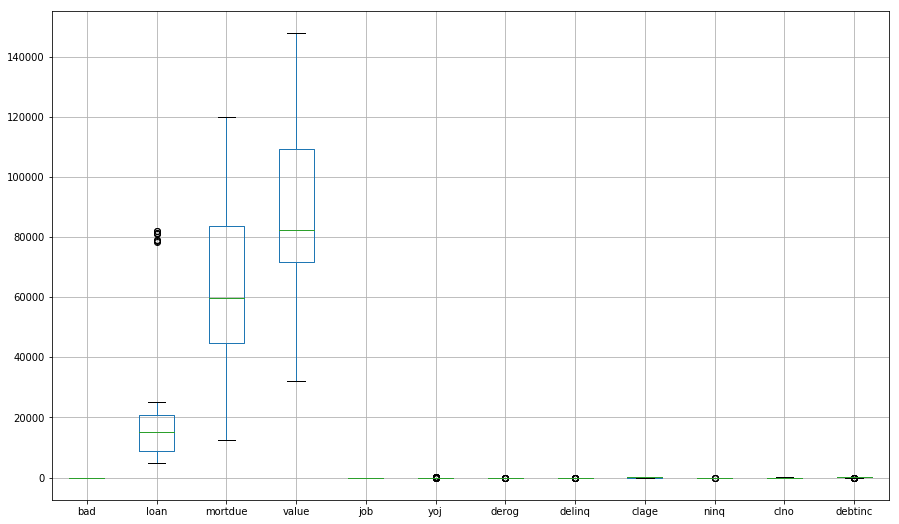

<Figure size 432x288 with 0 Axes>

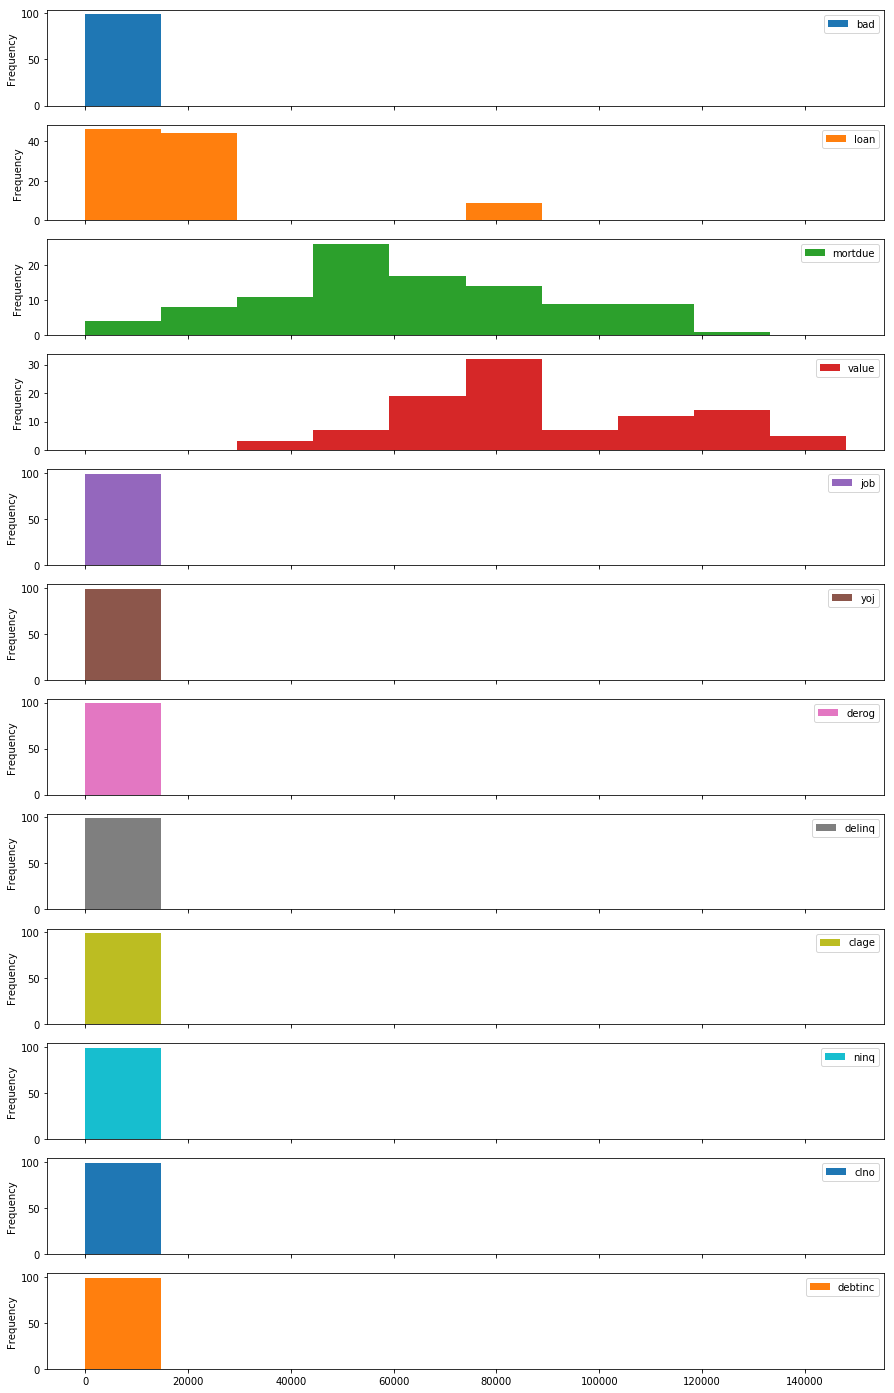

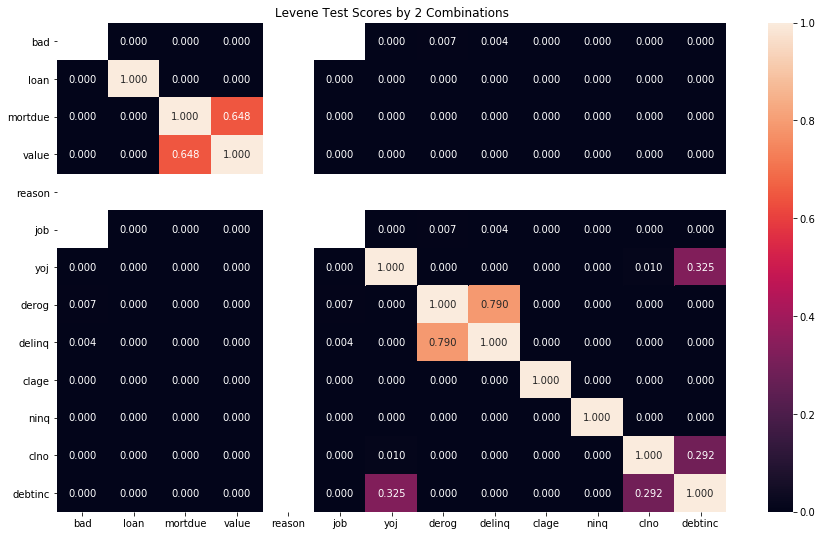

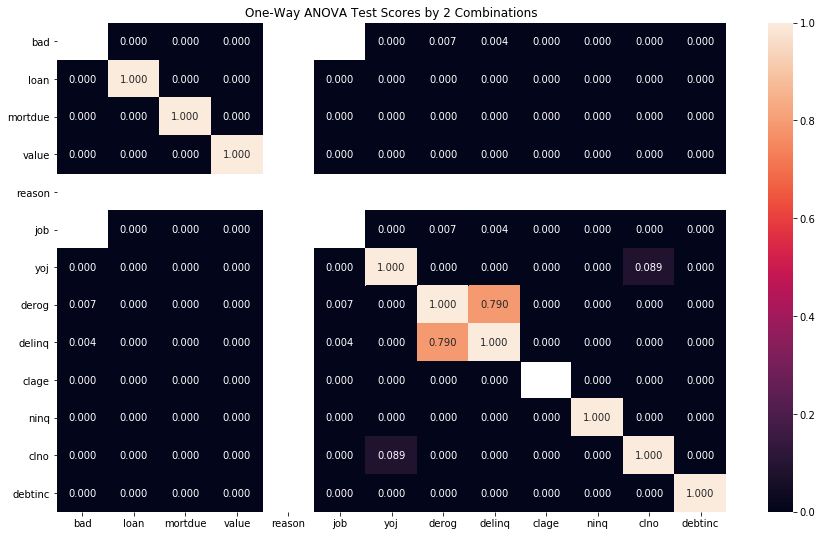

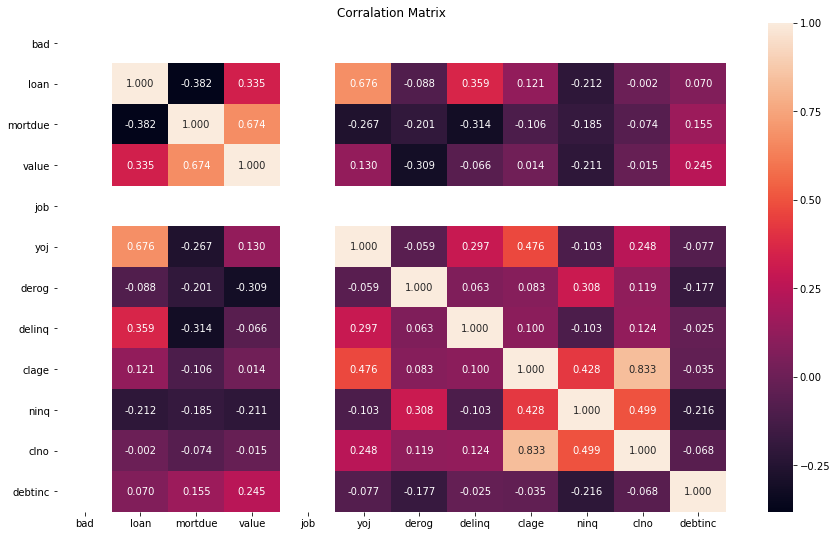

In [2]:
dataObject = DataDescribe("hmelq.mini.csv")
dataDescribe = dataObject.run()
dataDescribe

In [3]:
import gc
gc.collect()

70931